# TikTok E-commerce A/B Test & Creator Exploration
## Import Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
import warnings

warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")

## Data Exploration, Clean, & Manipulation
### Upload Dataset
Merge the `#TikTokMadeMeBuyIt` specific dataset with the general TikTok organic dataset.

In [ ]:
df_mademe = pd.read_csv('Tik_Tok.csv')
df_general = pd.read_csv('dataset_tiktok-scraper_2026-02-06_18-16-52-572.csv')

exp = pd.concat([df_mademe, df_general], ignore_index=True)

exp.head()

,authorMeta.avatar,authorMeta.name,text,diggCount,shareCount,playCount,commentCount,collectCount,videoMeta.duration,musicMeta.musicName,musicMeta.musicAuthor,musicMeta.musicOriginal,createTimeISO,webVideoUrl
0,https://p16-common-sign.tiktokcdn-us.com/tos-m...,cute.by.ke,#dollartree #craftorganization #tiktokmademebu...,294800,16700,3600000,3783,24956,29,original sound,Candles of Essence,True,2022-06-08T15:09:57.000Z,https://www.tiktok.com/@cute.by.ke/video/71068...
1,https://p16-common-sign.tiktokcdn-us.com/tos-m...,mysterysuspensejunkies,12 Books That Will Keep You Up At Night #bookt...,9997,2924,322200,116,3713,31,original sound,Mystery And Suspense Books,True,2022-06-02T22:19:59.000Z,https://www.tiktok.com/@mysterysuspensejunkies...
2,https://p19-common-sign.tiktokcdn-us.com/tos-u...,nolaviva_,Solo picnic for self care 💕find everything on ...,395600,4865,2700000,1234,24909,31,original sound,Nola Viva,True,2022-06-03T23:18:06.000Z,https://www.tiktok.com/@nolaviva_/video/710515...
3,https://p16-common-sign.tiktokcdn-us.com/tos-m...,sarahaulbrook,You ask and you shall relieve. Slushier coffee...,29000,541,341400,319,1117,147,GOOD VIBES,Ellen Once Again,False,2022-06-02T20:27:31.000Z,https://www.tiktok.com/@sarahaulbrook/video/71...
4,https://p16-common-sign.tiktokcdn-us.com/tos-u...,dailynchannel,Dispensador de aceite y vinagre con boquilla d...,11700,512,179900,215,1318,31,sonido original,dailyn channel,True,2022-06-24T12:01:39.000Z,https://www.tiktok.com/@dailynchannel/video/71...


### Check Data Type and Basic Info

In [ ]:
exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   authorMeta.avatar        370 non-null    object
 1   authorMeta.name          370 non-null    object
 2   text                     369 non-null    object
 3   diggCount                370 non-null    int64 
 4   shareCount               370 non-null    int64 
 5   playCount                370 non-null    int64 
 6   commentCount             370 non-null    int64 
 7   collectCount             370 non-null    int64 
 8   videoMeta.duration       370 non-null    int64 
 9   musicMeta.musicName      369 non-null    object
 10  musicMeta.musicAuthor    367 non-null    object
 11  musicMeta.musicOriginal  370 non-null    bool  
 12  createTimeISO            370 non-null    object
 13  webVideoUrl              370 non-null    object
dtypes: bool(1), int64(6), object(7)
memory usa

### Check for Null Values in Each Column

In [ ]:
exp.isnull().sum()

,0
authorMeta.avatar,0
authorMeta.name,0
text,1
diggCount,0
shareCount,0
playCount,0
commentCount,0
collectCount,0
videoMeta.duration,0
musicMeta.musicName,1


### Data Clean - Standardize Columns

In [ ]:
rename_dict = {
    'authorMeta.name': 'creator_name',
    'text': 'text',
    'playCount': 'views',
    'diggCount': 'likes',
    'collectCount': 'collects',
    'shareCount': 'shares',
    'commentCount': 'comments',
    'videoMeta.duration': 'duration'
}
exp = exp.rename(columns=rename_dict)
exp = exp[['creator_name', 'text', 'views', 'likes', 'collects', 'shares', 'comments', 'duration']]
exp.head()

,creator_name,text,views,likes,collects,shares,comments,duration
0,cute.by.ke,#dollartree #craftorganization #tiktokmademebu...,3600000,294800,24956,16700,3783,29
1,mysterysuspensejunkies,12 Books That Will Keep You Up At Night #bookt...,322200,9997,3713,2924,116,31
2,nolaviva_,Solo picnic for self care 💕find everything on ...,2700000,395600,24909,4865,1234,31
3,sarahaulbrook,You ask and you shall relieve. Slushier coffee...,341400,29000,1117,541,319,147
4,dailynchannel,Dispensador de aceite y vinagre con boquilla d...,179900,11700,1318,512,215,31


### Data Clean - Drop duplicates and null values in 'text'

In [ ]:
exp = exp.drop_duplicates()
exp = exp.dropna(subset=['text'])
exp

,creator_name,text,views,likes,collects,shares,comments,duration
0,cute.by.ke,#dollartree #craftorganization #tiktokmademebu...,3600000,294800,24956,16700,3783,29
1,mysterysuspensejunkies,12 Books That Will Keep You Up At Night #bookt...,322200,9997,3713,2924,116,31
2,nolaviva_,Solo picnic for self care 💕find everything on ...,2700000,395600,24909,4865,1234,31
3,sarahaulbrook,You ask and you shall relieve. Slushier coffee...,341400,29000,1117,541,319,147
4,dailynchannel,Dispensador de aceite y vinagre con boquilla d...,179900,11700,1318,512,215,31
...,...,...,...,...,...,...,...,...
365,phsharere,7 PESOS LANGANG KURTINA#curtain #goodthing #ti...,298300,2223,143,178,569,14
366,creator_tiktokshopkel,#creatorsearchinsights #kids #toy #tiktokshop,568000,3068,676,201,177,9
367,sabnamraimahato,Suitable for all parts of the body as it has ...,495900,3945,238,434,130,37
368,riannagail,"genuinely so impressed by the quality, look, a...",79800,1273,628,64,37,115


### Data Clean - Convert Data Types

In [ ]:
exp['views'] = pd.to_numeric(exp['views'], errors='coerce')
exp['likes'] = pd.to_numeric(exp['likes'], errors='coerce')
exp['collects'] = pd.to_numeric(exp['collects'], errors='coerce')
exp['shares'] = pd.to_numeric(exp['shares'], errors='coerce')
exp['comments'] = pd.to_numeric(exp['comments'], errors='coerce')
exp['duration'] = pd.to_numeric(exp['duration'], errors='coerce')

exp.head()

,creator_name,text,views,likes,collects,shares,comments,duration
0,cute.by.ke,#dollartree #craftorganization #tiktokmademebu...,3600000,294800,24956,16700,3783,29
1,mysterysuspensejunkies,12 Books That Will Keep You Up At Night #bookt...,322200,9997,3713,2924,116,31
2,nolaviva_,Solo picnic for self care 💕find everything on ...,2700000,395600,24909,4865,1234,31
3,sarahaulbrook,You ask and you shall relieve. Slushier coffee...,341400,29000,1117,541,319,147
4,dailynchannel,Dispensador de aceite y vinagre con boquilla d...,179900,11700,1318,512,215,31


### Data Manipulation - Core Conversion Metric
Create `collect_rate` (Collects / Views) to measure user purchase intent and high-value engagement.

In [ ]:
exp['collect_rate'] = exp['collects'] / exp['views']

exp[['creator_name', 'text', 'views', 'collects', 'collect_rate', 'duration']].head()

,creator_name,text,views,collects,collect_rate,duration
0,cute.by.ke,#dollartree #craftorganization #tiktokmademebu...,3600000,24956,0.006932,29
1,mysterysuspensejunkies,12 Books That Will Keep You Up At Night #bookt...,322200,3713,0.011524,31
2,nolaviva_,Solo picnic for self care 💕find everything on ...,2700000,24909,0.009226,31
3,sarahaulbrook,You ask and you shall relieve. Slushier coffee...,341400,1117,0.003272,147
4,dailynchannel,Dispensador de aceite y vinagre con boquilla d...,179900,1318,0.007326,31


## Primary Statistics Exploration

In [ ]:
exp[['views', 'likes', 'collects', 'collect_rate', 'duration']].describe().round(4)

,views,likes,collects,collect_rate,duration
count,3.500000e+02,3.500000e+02,350.0000,350.0000,350.0000
mean,5.807615e+06,1.829052e+05,24819.8314,0.0059,25.8829
std,1.154133e+07,6.329941e+05,61409.9863,0.0070,36.8252
min,1.000000e+00,0.000000e+00,0.0000,0.0000,5.0000
25%,1.610000e+05,2.724000e+03,569.0000,0.0015,11.0000
50%,1.200000e+06,1.860000e+04,3738.0000,0.0034,15.0000
75%,6.100000e+06,1.204500e+05,25676.2500,0.0078,26.7500
max,9.610000e+07,8.400000e+06,547876.0000,0.0643,363.0000


### Views boxplot

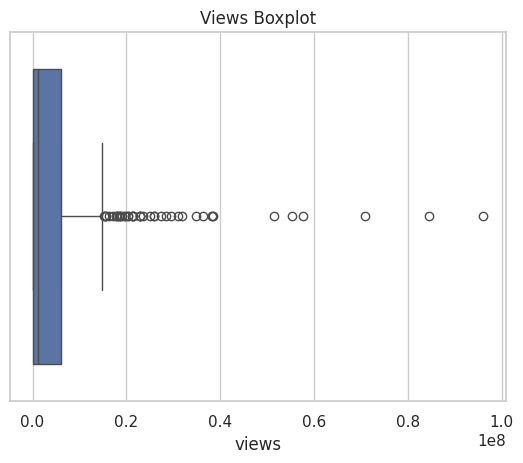

In [ ]:
sns.boxplot(x=exp['views'])

plt.title('Views Boxplot')

plt.show()

### Collect_rate Histogram

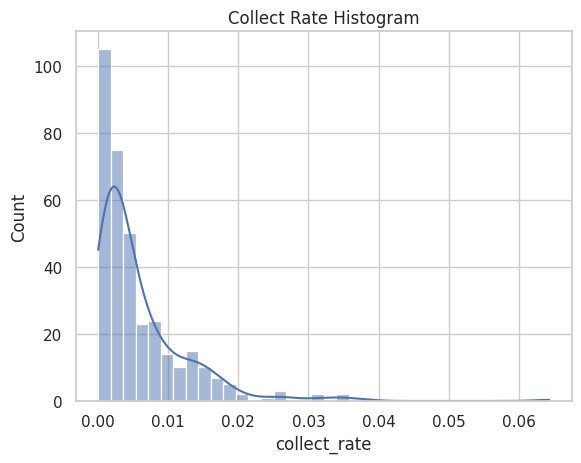

In [ ]:
sns.histplot(exp['collect_rate'], kde=True)
plt.title('Collect Rate Histogram')
plt.show()

## Visual Exploration: Duration vs. Conversion

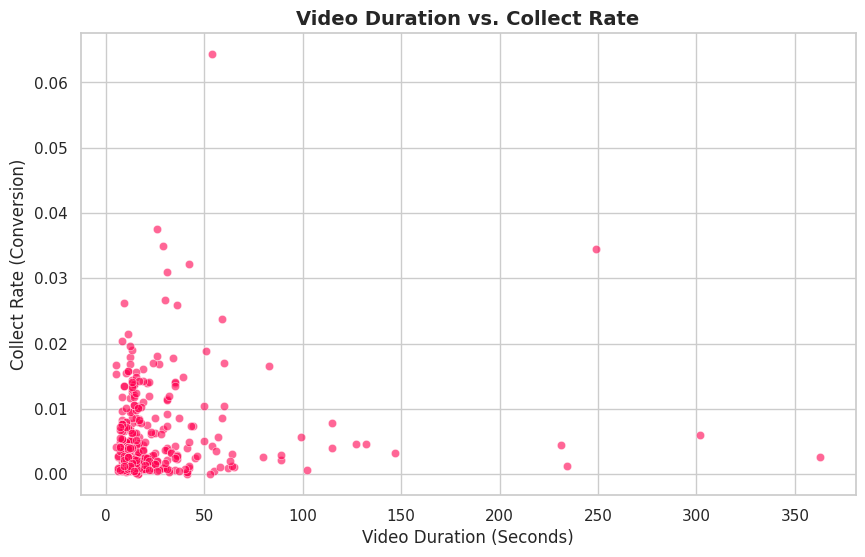

In [ ]:

plt.figure(figsize=(10, 6))

sns.scatterplot(data=exp, x='duration', y='collect_rate', alpha=0.6, color='#ff0050')

plt.title('Video Duration vs. Collect Rate', fontsize=14, fontweight='bold')
plt.xlabel('Video Duration (Seconds)', fontsize=12)
plt.ylabel('Collect Rate (Conversion)', fontsize=12)

plt.show()

## Deep Dive 1: High Potential Creator Incubation


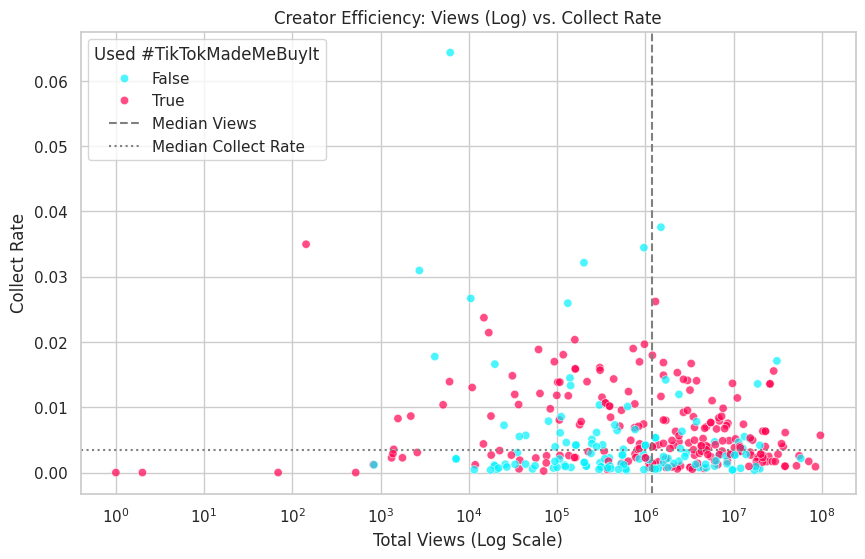

In [ ]:
exp['has_MadeMeBuyIt'] = exp['text'].str.contains(r'#tiktokmademebuyit', case=False, na=False)


plt.figure(figsize=(10, 6))


sns.scatterplot(
    data=exp,
    x='views',
    y='collect_rate',
    hue='has_MadeMeBuyIt',
    palette=['#00f2fe', '#ff0050'],
    alpha=0.7
)


plt.xscale('log')
plt.title('Creator Efficiency: Views (Log) vs. Collect Rate')
plt.xlabel('Total Views (Log Scale)')
plt.ylabel('Collect Rate')

plt.axvline(exp['views'].median(), color='grey', linestyle='--', label='Median Views')
plt.axhline(exp['collect_rate'].median(), color='grey', linestyle=':', label='Median Collect Rate')

plt.legend(title='Used #TikTokMadeMeBuyIt')
plt.show()

## Deep Dive 2: High-Potential Creator Incubation
**Criteria:** 1. `Views < Median` (Currently under-the-radar / cheap to acquire).
2. `Views > 10,000` (Removing absolute noise/luck-based outliers).
3. `Collect Rate > Average` (Demonstrated superior conversion ability).

In [ ]:
# 1. Calculate the "crosshairs" from the plot (Median Views and Global Avg Collect Rate)
median_views = exp['views'].median()
global_avg_collect_rate = exp['collects'].sum() / exp['views'].sum() # Weighted average is more accurate

# 2. Filter "Hidden Gems" (Top-left quadrant of the plot, excluding extreme low-view outliers)
incubation_candidates = exp[
    (exp['views'] < median_views) &
    (exp['collect_rate'] > global_avg_collect_rate) &
    (exp['views'] > 10000)
].copy()

# 3. Sort by collect rate in descending order and get the top 10
top_stars = incubation_candidates.sort_values('collect_rate', ascending=False).head(10).copy()

# 4. Convert collect rate to a readable percentage format
top_stars['collect_rate_%'] = top_stars['collect_rate'].apply(lambda x: f"{x:.2%}")

# 5. Print a clean, formatted report
print("--- Filtering Benchmarks ---")
print(f"Views Threshold (Must be below): {median_views:,.0f}")
print(f"Collect Rate Threshold (Must be above): {global_avg_collect_rate:.2%}")
print(f"Total Qualified Hidden Gems: {len(incubation_candidates)}")
print("-" * 50)
print("\n🔥 Top 10 High-Potential Creators for Incubation 🔥")

# Dynamically select columns to display (ensuring creator name, text, and views are included)
display_cols = ['views', 'collects', 'collect_rate_%']

if 'creator_name' in exp.columns:
    display_cols.insert(0, 'creator_name')
if 'duration' in exp.columns:
    display_cols.append('duration')
if 'text' in exp.columns:
    display_cols.append('text')

# Display the final table
display(top_stars[display_cols])

--- Filtering Benchmarks ---
Views Threshold (Must be below): 1,200,000
Collect Rate Threshold (Must be above): 0.43%
Total Qualified Hidden Gems: 67
--------------------------------------------------

🔥 Top 10 High-Potential Creators for Incubation 🔥


,creator_name,views,collects,collect_rate_%,duration,text
333,jeff_jeudy,960700,33094,3.44%,249,Sign up For The TikTok \nShop Affiliate Progra...
323,itstanyatime8,201100,6463,3.21%,42,С ТЕБЯ ПОДПИСКА✅ и ❤️\nСледующее видео 🔝 5 ТОВ...
77,shon.ecom,10500,280,2.67%,30,This is by far the best side hustle 😭 make sur...
239,belladaroca2,132000,3424,2.59%,36,✅Promoção Relâmpago Tik Tok shop ⚡⚡⚡\n#TikTokS...
54,dailyfulfillsource,14800,351,2.37%,59,3 winning dropshipping products will go viral ...
207,lunaglowro,16800,360,2.14%,11,"LunaGlow, la doar 129.99 lei cu transport incl..."
209,pawsonic.official,158600,3227,2.03%,8,#foryoupage❤️❤️ #foruyou #foruyou #dog #tik #p...
203,mytrendorder.com,975200,19162,1.96%,12,Link is in the Bio😍👍🏼 #tiktokmademebuyit #spac...
135,midnightaura,727300,13808,1.90%,13,"Sorry babe 😅, 50% OFF NOW + Free Shipping #fy ..."
17,jeremyrayfinance,61600,1161,1.88%,51,test these💪🏻📈 #winningproducts #shopify #drops...


## Deep Dive 3: NLP & Consumer Insight

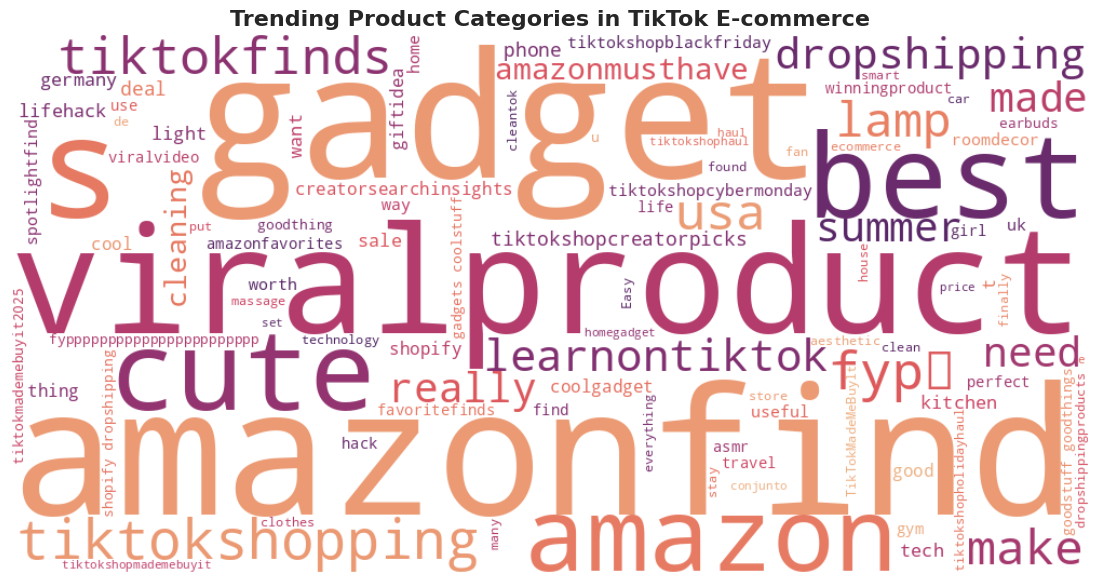

In [ ]:

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


text_data = ' '.join(exp['text'].dropna().astype(str).tolist())


custom_stopwords = set(STOPWORDS)
custom_stopwords.update([

    'tiktok', 'fyp', 'viral', 'video', 'trend', 'trending',
    'tiktokmademebuyit', 'tiktokshop', 'shop', 'finds', 'buy',

    'for', 'you', 'foryou', 'foryoupage', 'foryourpage',
    'gift', 'gifts', 'must', 'have', 'musthave', 'musthaves',
    'link', 'bio', 'now', 'get', 'yours', 'one', 'will', 'got', 'time',

    'tiktokshopfinds', 'product', 'products', 'shopping', 'item', 'items'
])


wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    colormap='flare',
    stopwords=custom_stopwords,
    max_words=100,
    random_state=42
).generate(text_data)


plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Trending Product Categories in TikTok E-commerce', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## Deep Dive 4: Duration "Sweet Spot" Analysis


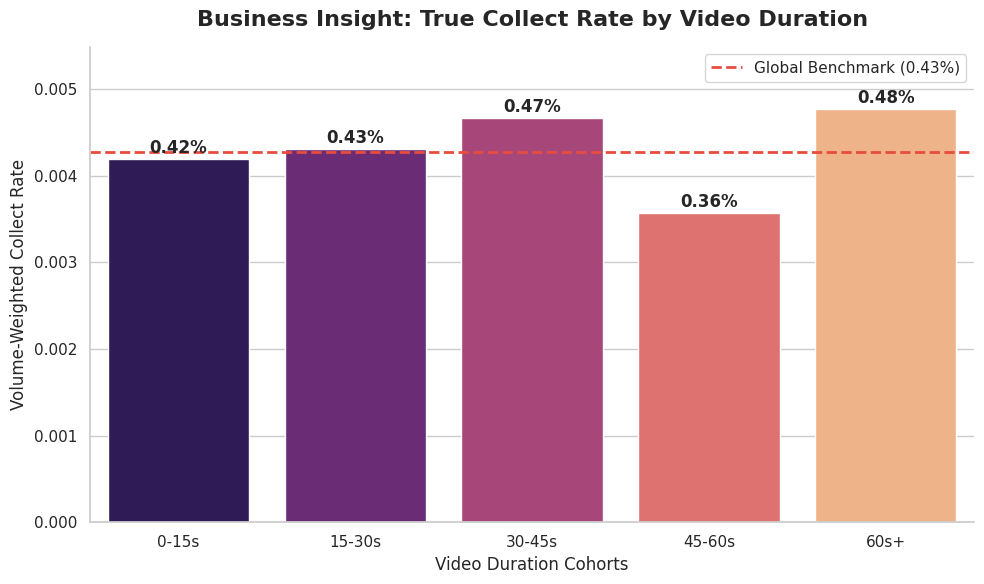


📊 (Business Summary Table):


,duration_bins,total_views,total_collects,video_count,true_collect_rate
0,0-15s,"1,104,858,424","4,630,596",168,0.42%
1,15-30s,"641,268,593","2,761,324",101,0.43%
2,30-45s,"230,117,195","1,074,650",44,0.47%
3,45-60s,"40,682,960","145,255",14,0.36%
4,60s+,"15,738,249","75,116",23,0.48%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


bins = [0, 15, 30, 45, 60, float('inf')]
labels = ['0-15s', '15-30s', '30-45s', '45-60s', '60s+']


df_clean = exp.copy()
df_clean['duration_bins'] = pd.cut(df_clean['duration'], bins=bins, labels=labels, right=False)


business_analysis = df_clean.groupby('duration_bins', observed=False).agg(
    total_views=('views', 'sum'),
    total_collects=('collects', 'sum'),
    video_count=('views', 'count')
).reset_index()


business_analysis['true_collect_rate'] = business_analysis['total_collects'] / business_analysis['total_views']

global_conversion = df_clean['collects'].sum() / df_clean['views'].sum()

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))


ax = sns.barplot(
    data=business_analysis,
    x='duration_bins',
    y='true_collect_rate',
    palette="magma",
    hue='duration_bins',
    legend=False
)


plt.axhline(global_conversion, color='#e74c3c', linestyle='--', linewidth=2,
            label=f'Global Benchmark ({global_conversion:.2%})')


for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 8),
                textcoords='offset points',
                fontweight='bold')

plt.title('Business Insight: True Collect Rate by Video Duration', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Video Duration Cohorts', fontsize=12)
plt.ylabel('Volume-Weighted Collect Rate', fontsize=12)
plt.ylim(0, business_analysis['true_collect_rate'].max() * 1.15)
plt.legend(loc='upper right')
sns.despine()

plt.tight_layout()
plt.show()


print("\n📊 (Business Summary Table):")
display(business_analysis.style.format({'true_collect_rate': '{:.2%}', 'total_views': '{:,}', 'total_collects': '{:,}'}))

###Hypothesis Testing
**Goal:** Determine if the hashtag #TikTokMadeMeBuyIt significantly outperforms #tiktokshopfinds in driving user intent (Collect Rate).
**Method:** Perform a 2-sample T-test to calculate the P-value and visualize the distribution of conversion rates across both groups.

In [ ]:
from scipy import stats

# 1. Grouping Data
group_exp = exp[exp['has_MadeMeBuyIt'] == True]['collect_rate'].dropna()
group_ctrl = exp[exp['has_MadeMeBuyIt'] == False]['collect_rate'].dropna()

# 2. Execution (Welch's T-Test)
t_stat, p_val = stats.ttest_ind(group_exp, group_ctrl, equal_var=False)

# 3. Professional Output
print(f"Experimental Group (Mean): {group_exp.mean():.4%}")
print(f"Control Group (Mean):      {group_ctrl.mean():.4%}")
print(f"P-Value: {p_val:.4f}")

# 4. Logic Decision
alpha = 0.05
if p_val < alpha:
    print(f"CONCLUSION: Significant (p < {alpha}). This hashtag is a key driver for conversion.")
else:
    print(f"CONCLUSION: Not Significant (p >= {alpha}). No statistical evidence that this hashtag helps.")